
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: October 19, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Samir Epili se7982
2. Siddhant Chauhan sc54788

# Question 1 - MLP Regressor (15 pts) 
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.


   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

### 1) (5pts) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

(a) hidden_layer_sizes = (5,)

(b) hidden_layer_sizes = (15,)

(c) hidden_layer_sizes = (50,)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

MLP = MLPRegressor

In [ ]:
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 5 hidden nodes
MLP5 = MLPRegressor(hidden_layer_sizes = (5,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 20, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_5_pred_train = MLP5.predict(X_train_scaled)
MLP_5_pred_test = MLP5.predict(X_test_scaled)

MLP_5_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_5_pred_train))
MLP_5_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_5_pred_test))

print('Train RMSE for 5 nodes : {}\nTest RMSE : {}'.format(MLP_5_RMSE_train, MLP_5_RMSE_test))

Train RMSE for 5 nodes : 3.360128954016189
Test RMSE : 4.7984130428905605


In [ ]:
# 15 hidden nodes
MLP15 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 20, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_15_pred_train = MLP15.predict(X_train_scaled)
MLP_15_pred_test = MLP15.predict(X_test_scaled)

MLP_15_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_15_pred_train))
MLP_15_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_15_pred_test))

print('Train RMSE for 15 nodes : {}\nTest RMSE : {}'.format(MLP_15_RMSE_train, MLP_15_RMSE_test))

Train RMSE for 15 nodes : 3.0199130137125887
Test RMSE : 4.5517066936252295


In [ ]:
# 50 hidden nodes
MLP50 = MLPRegressor(hidden_layer_sizes = (50,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 20, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_50_pred_train = MLP50.predict(X_train_scaled)
MLP_50_pred_test = MLP50.predict(X_test_scaled)

MLP_50_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_50_pred_train))
MLP_50_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_50_pred_test))

print('Train RMSE for 50 nodes : {}\nTest RMSE : {}'.format(MLP_50_RMSE_train, MLP_50_RMSE_test))

Train RMSE for 50 nodes : 2.940964154111819
Test RMSE : 4.77266846123953


**ANSWER**

- The best Test RMSE is for the 15 hidden nodes
- 50 Hidden nodes performs better on the train RMSE but almost similar to the 5 hidden nodes test RMSE.
- Overfitting may have played a role in the 50 Hidden nodes MLP model

### 2) (5pts) MLPRegressor has a built-in attribute loss_curve_ which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as my_model you can call it as my_model.loss_curve_ (example). Plot three curves using the following three conditions (a, b, c) in one figure, where X-axis is epoch number and Y-axis is squared root of loss_curve_:

(a) hidden_layer_sizes = (5,)

(b) hidden_layer_sizes = (15,)

(c) hidden_layer_sizes = (50,)

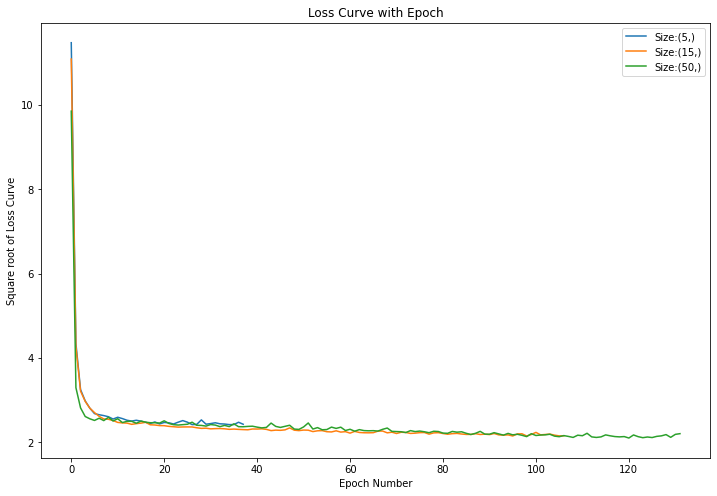

In [ ]:
# hidden layer size list
hidden_layer_size_list = [(5,), (15,), (50,)]

plt.figure(figsize = (12,8))

# fit the model
for size in hidden_layer_size_list:
    mlp_model = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate = 'constant', 
                             random_state = 42, batch_size = 20, learning_rate_init = 0.005, 
                             hidden_layer_sizes = size)
    
    mlp_model.fit(X_train_scaled, y_train)
    plot_label = "Size:" + str(size)
    
    plt.plot(np.sqrt(mlp_model.loss_curve_), label = plot_label)
    plt.legend(loc = 'best')
    plt.title("Loss Curve with Epoch")
    plt.ylabel("Square root of Loss Curve")
    plt.xlabel("Epoch Number")


### 3) (5pts) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size.
Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.




In [ ]:
# 15 hidden nodes and Batch size 1
MLP15B1 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 1, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_15B1_pred_train = MLP15B1.predict(X_train_scaled)
MLP_15B1_pred_test = MLP15B1.predict(X_test_scaled)

MLP_15B1_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_15B1_pred_train))
MLP_15B1_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_15B1_pred_test))

print('Train RMSE for 15 nodes & 1 Batch Size : {}\nTest RMSE & 1 Batch Size: {}'.format(MLP_15B1_RMSE_train, MLP_15B1_RMSE_test))

Train RMSE for 15 nodes & 1 Batch Size : 5.1184559830915
Test RMSE & 1 Batch Size: 6.502712686422412


In [ ]:
# 15 hidden nodes and Batch size 20
MLP15B20 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 20, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_15B20_pred_train = MLP15B20.predict(X_train_scaled) 
MLP_15B20_pred_test = MLP15B20.predict(X_test_scaled)

MLP_15B20_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_15B20_pred_train))
MLP_15B20_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_15B20_pred_test))

print('Train RMSE for 15 nodes & 20 Batch Size : {}\nTest RMSE & 20 Batch Size : {}'.format(MLP_15B20_RMSE_train, MLP_15B20_RMSE_test))

Train RMSE for 15 nodes & 20 Batch Size : 3.0199130137125887
Test RMSE & 20 Batch Size : 4.5517066936252295


In [ ]:
# 15 hidden nodes and Batch size 2000
MLP15B2000 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 2000, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_15B2000_pred_train = MLP15B2000.predict(X_train_scaled)
MLP_15B2000_pred_test = MLP15B2000.predict(X_test_scaled)

MLP_15B2000_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_15B2000_pred_train))
MLP_15B2000_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_15B2000_pred_test))

print('Train RMSE for 15 nodes : {}\nTest RMSE : {}'.format(MLP_15B2000_RMSE_train, MLP_15B2000_RMSE_test))

Train RMSE for 15 nodes : 4.691211182968425
Test RMSE : 5.720074226959563


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Plotting the loss curves with 3 different batch sizes

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


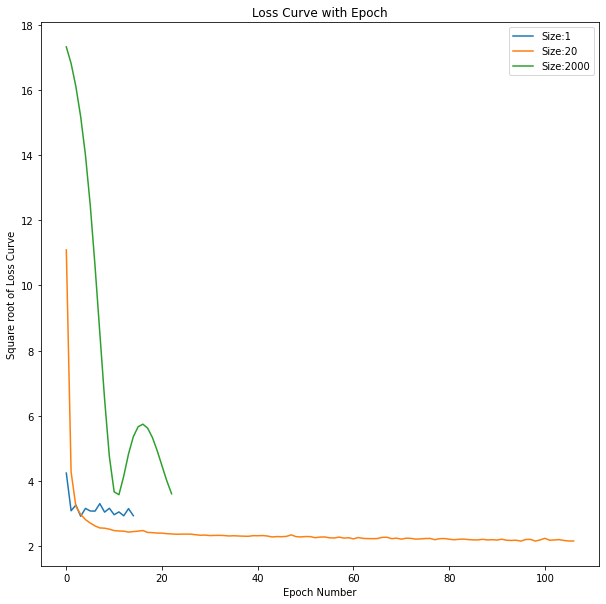

In [ ]:
# Batches size list
batches_size_list = [(1), (20), (2000)]

plt.figure(figsize = (10,10))

# fit the model
for size in batches_size_list:
    mlp_model = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate = 'constant', 
                             random_state = 42, batch_size = size, learning_rate_init = 0.005, 
                             hidden_layer_sizes = 15)
    
    mlp_model.fit(X_train_scaled, y_train)
    plot_label = "Size:" + str(size)
    
    x = plt.plot(np.sqrt(mlp_model.loss_curve_), label = plot_label)
    plt.legend(loc = 'best')
    plt.title("Loss Curve with Epoch")
    plt.ylabel("Square root of Loss Curve")
    plt.xlabel("Epoch Number")
    plt.autoscale(enable=True, axis='both', tight=False)
    #plt.xscale(40)

**ANSWER**

- Batch size represents the total number of training examples present in a single batch. A large batch size can be used to allower faster processing speeds for the model. A smaller batch boucnes around before reaching towards the global optimal value compared ot a large batch size which can reach there faster but can lead to generalizing but it could vary on the quality of how good the generalization will be.

batch size 1: SGD ; batch size 2: mini-batch ; batch size: 2000 is very large.



# Question 2: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

# Answer 2

## Part 1

Tanh Test loss: 0.152

Tanh Training loss: 0.160

Linear Test loss: 0.492

Linear Training loss: 0.488

The decision boundary of the tanh function changes shape more drastically and eventually stabilizes as a stretched out parabola that classifies points within the two boundaries as one class and those on the outside as the other. The linear function simply rotates a single linear decision boundary that runs through the clusters and can't do much better than a 50/50 split of the points. This occurs because, by definition, nonlinear transformation functions, like tanh, must be used to create nonlinear decision boundaries since a linear transformation results in an output that is ultimately a linear combination.

## Part 2

4 Neuron Test loss: 0.022

4 Neuron Training: loss 0.015

8 Neuron Test loss: 0.016

8 Neuron Training: loss 0.008

As the number of neurons increase, the decision boundary starts to become more flexible — from a cross shape with 4 neurons to more distinct boundaries that completely separate from one another using 8 neurons. This is because adding more neurons increases complexity of the model which makes it more sensitive when fitting training data points. As a result, the 8 neuron model could classify with more certainty, the points in the middle of the squares in an hourglass shape.

## Part 3

Learning Rate = 10:

*  100 epochs:
 *  Train Loss: 0.568
 *  Test Loss: 0.545

* 1000 epochs:
 * Train Loss: 0.568
 * Test Loss: 0.544

Learning Rate = 0.1:

*  100 epochs:
 *  Train Loss: 0.004
 *  Test Loss: 0.007

*  1000 epochs:
 *  Train Loss: 0.000
 *  Test Loss: 0.001

Learning Rate = 0.01:

*  100 epochs:
 *  Train Loss: 0.091
 *  Test Loss: 0.104

*  1000 epochs:
 *  Train Loss: 0.008
 *  Test Loss: 0.027

Learning Rate = 0.001

* 100 epochs:
 *  Train Loss: 0.337
 *  Test Loss: 0.349

* 1000 epochs:
 * Train Loss: 0.097
 * Test Loss: 0.099

The loss curves for the models at each of the learning rates were steepest within the first 100 epochs. Further, besides for learning rate = 10, the loss continuously decreased throughout the 1,000 epochs. However, for learning rate = 10, the loss increased sharply at first and then stabilized completely. This behavior for learning rate = 10 is likely because the model would initially diverge by overshooting the local minima when updating the weights, whereas the behavior of the model with the other learning rate was increasingly more gradual as the learning rate decreased. Thus, with decreasing learning rate, the function converged slower, but was less likely to diverge from a local minimum.

## Part 4
The model used consisted of 1 hidden layer, 3 features (X1, X2, X1X2), and tanh as the activation function. The input function X1X2 was chosen since X1 and X2 are clearly dependent and multicollinear in nature upon visual inspection of the data. However, including the features X1 and X2 independently can also account for some test points of a particular class that might lie very close to a cluster of a different class. A tanh activation was used since it is a versatile nonlinear activation and the learning rate was kept at 0.03 because increasing it beyond this point would either result in a higher test loss or cause the model to diverge by 1,000 epochs. The drawbacks of this particular model is are that it might take a relatively long time to converge depeding on the number of data points and because it only uses a single hidden layer, it may not be sufficient for more complex data sets since the model itself is not very flexible with a limited number of hyperparameters. On the other hand, it is very unlikely to overfit.

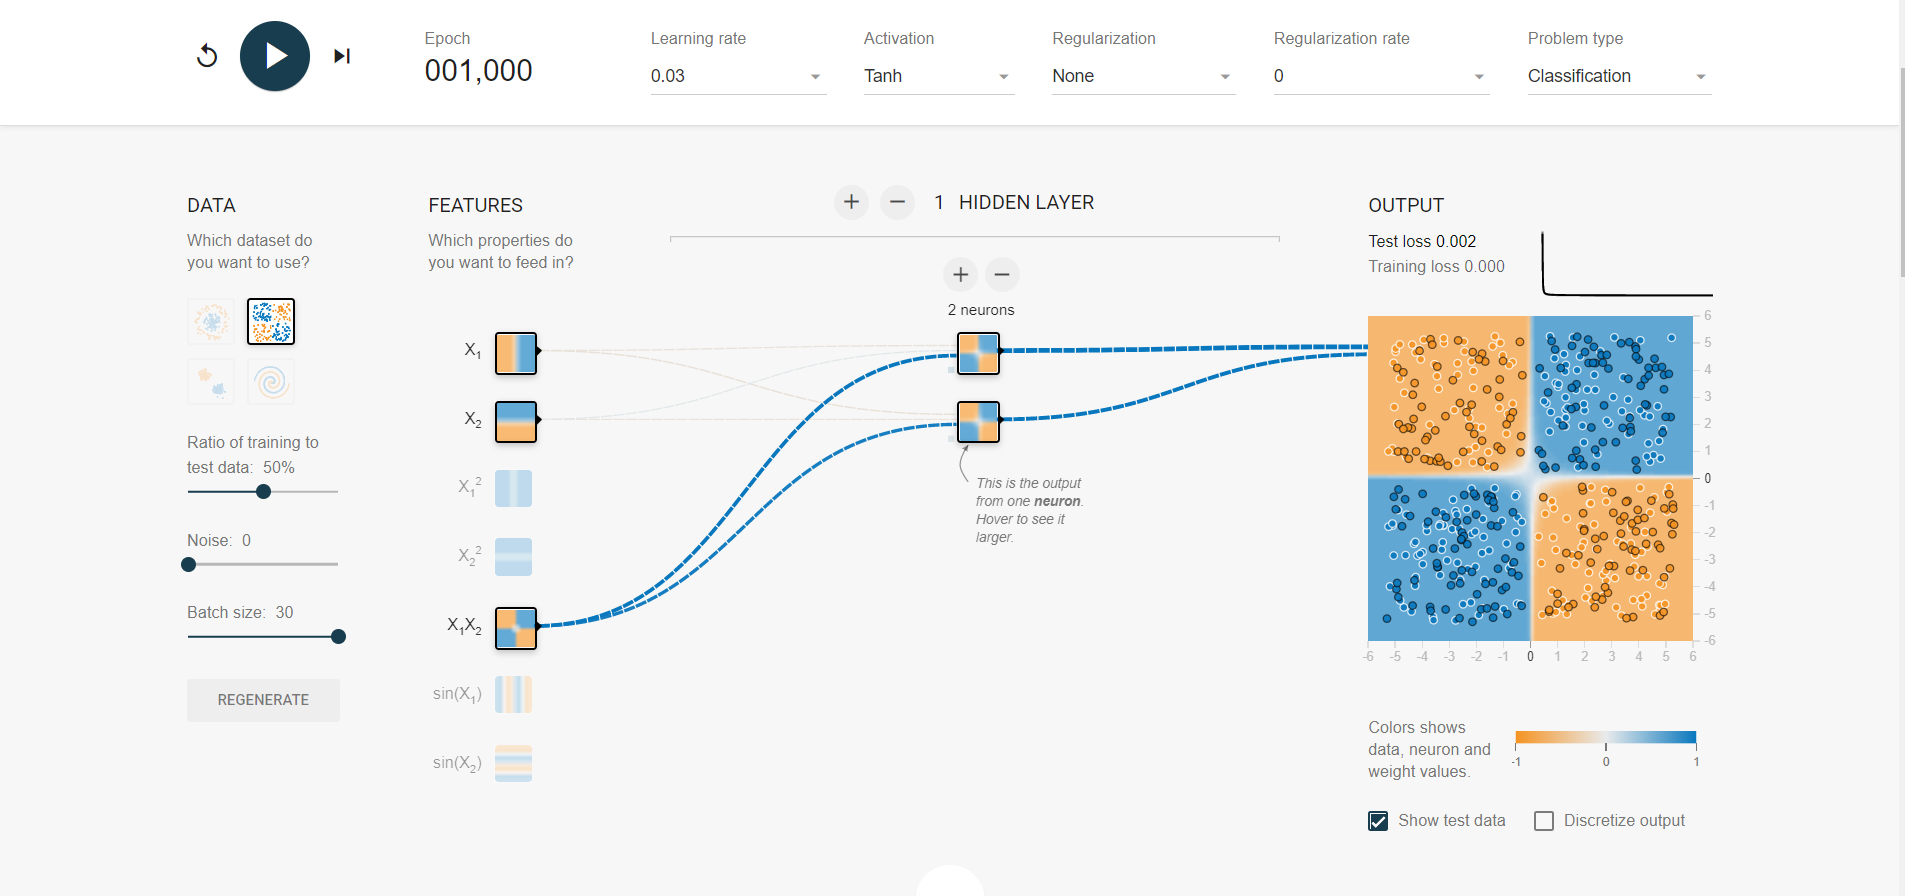

In [ ]:
from IPython.display import Image
Image(filename = "tensor_flow.PNG")

# Question 3 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

In [ ]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

class_df = pd.read_csv("class.csv")

# Answer 3

## Part 1

In [ ]:
# group categories into 2 meta-classes
def meta_class(class_type):
    if class_type in [1,2,3,4,5]:
        return 1
    else:
        return 0

df_ETA = df.copy(deep=True)
df_ETA['class_type'] = df['class_type'].map(meta_class)

In [ ]:
# create corrplot
corr_plot = df_ETA.set_index('animal_name').corr()
corr_plot

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,0.191681
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,0.231403
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,-0.340420
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,0.384958
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,-0.104718
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.022463
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.051022
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,0.575085
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,1.000000
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,0.207666


In [ ]:
# top 5 positively correlated features with class_type:
pos_corr = corr_plot['class_type'].sort_values(ascending = False)
top_5_pos = pos_corr[1:6]
top_5_pos

backbone    1.000000
tail        0.731762
toothed     0.575085
milk        0.384958
catsize     0.356976
Name: class_type, dtype: float64

## Part 2

In [ ]:
# top 5 negatively correlated features with class_type:
neg_corr = corr_plot['class_type'].sort_values(ascending = True)[:5]
top_5_neg = neg_corr
top_5_neg

legs       -0.432856
eggs       -0.340420
venomous   -0.246611
airborne   -0.104718
aquatic     0.022463
Name: class_type, dtype: float64

## Part 3

In [ ]:
#RFE feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X,y)
X.columns.values[selector.support_]

array(['feathers', 'milk', 'toothed', 'backbone', 'breathes'],
      dtype=object)

In [ ]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=50)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Part 4

In [ ]:
# function for isolating indices of features in X
def find_index(ft_list):
    index_list = []
    for feature in ft_list:
        index_list.append(np.where(X.columns.values == feature)[0][0])
    return index_list

# isolating data related to only the top 5 positively correlated features
X_train_pos = np.delete(X_train_scaled, find_index(top_5_pos.index.values), 1)
X_test_pos = np.delete(X_test_scaled, find_index(top_5_pos.index.values), 1)

# isolating data related to only the top 5 negatively correlated features
X_train_neg = np.delete(X_train_scaled, find_index(top_5_neg.index.values), 1)
X_test_neg = np.delete(X_test_scaled, find_index(top_5_neg.index.values), 1)

# isolating data related to only the top 5 features selected by RFE
X_train_RFE = np.delete(X_train_scaled, find_index(X.columns.values[selector.support_]), 1)
X_test_RFE = np.delete(X_test_scaled, find_index(X.columns.values[selector.support_]), 1)

In [ ]:
## a. Model trained with top 5 positively correlated features

mlp_mod_pos = MLPRegressor(max_iter = 1000, random_state = 1).fit(X_train_pos, y_train)
pred_test_pos = mlp_mod_pos.predict(X_test_pos)

## b. Model trained with top 5 negatively correlated features

mlp_mod_neg = MLPRegressor(max_iter = 1000, random_state = 1).fit(X_train_neg, y_train)
pred_test_neg = mlp_mod_neg.predict(X_test_neg)

## c. Model trained with top 5 features selected by RFE

mlp_mod_RFE = MLPRegressor(max_iter = 1000, random_state = 1).fit(X_train_RFE, y_train)
pred_test_RFE = mlp_mod_RFE.predict(X_test_RFE)

## d. Model trained with all features

mlp_mod_all = MLPRegressor(max_iter = 1000, random_state = 1).fit(X_train_scaled, y_train)
pred_test_all = mlp_mod_all.predict(X_test_scaled)

print('R2 using top 5 positively correlated features: ', mlp_mod_pos.score(X_test_pos, y_test))
print('R2 using top 5 negatively correlated features: ', mlp_mod_neg.score(X_test_neg, y_test))
print('R2 using the top 5 features selected by RFE: ', mlp_mod_RFE.score(X_test_RFE, y_test))
print('R2 using entire data set: ', mlp_mod_all.score(X_test_scaled, y_test))

R2 using top 5 positively correlated features:  0.9669220169768712
R2 using top 5 negatively correlated features:  0.9229525966740726
R2 using the top 5 features selected by RFE:  0.9135141680414453
R2 using entire data set:  0.9759995902856967


## Part 5

Using the 5 most positively or negatively correlated features reduces dimensionality, but could present a multicollinearity problem where one or many features is a function of another feature. This could result in a misleadingly high R^2 since features that are functions of other features do not add to the predictive power of the model and instead overfit to the training data. For example features like backbone and tail are highly correlated because most animals that have a tail also have a backbone. This could be why when using the top 5 positively correlated features the R^2 is significantly higher than that obtained from using RFE or the top 5 negatively correlated features. In the latter, the negatively correlated features reduces the R^2 further since they are much less correlated to class_type than the positive features, thus, producing a poorer least squares fit. Moreover, RFE recursively selects features using different metrics besides correlation which avoids the multicollinearity problem but reduces the R^2. Using the entire data set without feature selection produces a model with the highest R^2 value which may be using redundant features that are explained by others.

# Question 4 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 4.1 (5 points)
Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [ ]:
df['bedrooms'].isnull().sum()

2150

In [ ]:
df.isnull().sum() # from the df get all the Null or NaN values and then sum it for each column ( can also use .isna() )

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64

In [ ]:
df['yr_renovated'] = df.apply(
    lambda x: x['yr_built'] if x['yr_renovated']==0 else x['yr_renovated'], 
    axis=1)        
df[:10]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955.0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991.0,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933.0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965.0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987.0,98074.0,510000.0
5,4.0,4.50,5420.0,NaN,1.0,0.0,NaN,3.0,11.0,3890.0,1530.0,2001,2001.0,98053.0,1230000.0
6,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995,1995.0,98003.0,257500.0
7,3.0,1.50,1060.0,9711.0,1.0,NaN,0.0,3.0,7.0,1060.0,0.0,1963,1963.0,98198.0,291850.0
8,3.0,1.00,1780.0,NaN,1.0,0.0,0.0,3.0,7.0,1050.0,NaN,1960,1960.0,NaN,229500.0
9,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003,2003.0,98038.0,323000.0


### Question 4.2 (6 points)

Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [ ]:
df_dm = df.copy()
df_dm['binned_yr_built'] = pd.cut(df_dm['yr_built'], 
                                  bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                                  labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                  include_lowest=True)

df_dm[['binned_yr_built']]




,binned_yr_built
0,1940-1960
1,1940-1960
2,1920-1940
3,1960-1980
4,1980-2000
...,...
21608,2000-2020
21609,2000-2020
21610,2000-2020
21611,2000-2020


In [ ]:
# Perform One Hot Encoding using the binned_yr_built column

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
OHE = pd.get_dummies(df_dm['binned_yr_built'])
print(OHE.head())

   1900-1920  1920-1940  1940-1960  1960-1980  1980-2000  2000-2020
0          0          0          1          0          0          0
1          0          0          1          0          0          0
2          0          1          0          0          0          0
3          0          0          0          1          0          0
4          0          0          0          0          1          0


## Question 4.3 (4 points)
Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [ ]:
temp_df = df.copy()

temp_df = temp_df.dropna(axis=0, how='any')

temp_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0
6,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995,0,98003.0,257500.0
9,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003,0,98038.0,323000.0
10,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,3.0,8.0,1860.0,1700.0,1965,0,98007.0,662500.0


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt  # To visualize

import numpy as np
import pandas as pd

In [ ]:
features= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode']

X = temp_df[features]
Y = temp_df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 1851
number of training samples: 4317


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, Y)

model = reg.fit(x_train, y_train)
predictions = model.predict(x_train)

print('R^2 score (train):', r2_score(y_train, predictions))

testpredictions = model.predict(x_test)
print('R^2 score (test):', r2_score(y_test, testpredictions))

R^2 score (train): 0.6729018394792141
R^2 score (test): 0.6684300393133107


## Question 4.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a linear regression model. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [ ]:
X = df.drop(['price'], axis = 1)
Y = df['price'].values


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

#using mean 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(x_train, y_train)
x_tr_mean = imp_mean.transform(x_train)
x_te_mean = imp_mean.transform(x_test)

model_mean = reg.fit(x_tr_mean, y_train)
predictions_mean = model_mean.predict(x_tr_mean)

print('R^2 score (train) via mean:', r2_score(y_train, predictions_mean))

testpredictions_mean = model_mean.predict(x_te_mean)
print('R^2 score (test) via mean:', r2_score(y_test, testpredictions_mean))



R^2 score (train) via mean: 0.6236344515372277
R^2 score (test) via mean: 0.6285746671688925


In [ ]:
#using median 
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_median.fit(x_train, y_train)
x_tr_median = imp_median.transform(x_train)
x_te_median = imp_median.transform(x_test)

model_median = reg.fit(x_tr_median, y_train)
predictions_median = model.predict(x_tr_median)

print('R^2 score (train) via median:', r2_score(y_train, predictions_median))

testpredictions_median = model_median.predict(x_te_median)
print('R^2 score (test) via median:', r2_score(y_test, testpredictions_median))


R^2 score (train) via median: 0.6179625709262766
R^2 score (test) via median: 0.6230398349541966


In [ ]:
#most frequent


from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp_mf.fit(x_train, y_train)
x_tr_mf = imp_mf.transform(x_train)
x_te_mf = imp_mf.transform(x_test)

model_mf = reg.fit(x_tr_mf, y_train)
predictions_mf = model_mf.predict(x_tr_mf)

print('R^2 score (train) via most_frequent:', r2_score(y_train, predictions_mf))

testpredictions_mf = model_mf.predict(x_te_mf)
print('R^2 score (test) via most_frequent:', r2_score(y_test, testpredictions_mf))


R^2 score (train) via most_frequent: 0.6114718373287964
R^2 score (test) via most_frequent: 0.6181371912459184


### Running KNN with values of 2, 5, 10, 20

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
# Running with value of 2

imp_knn2 = KNNImputer(n_neighbors = 2)
imp_knn2.fit(x_train, y_train)
x_train_knn2 = imp_knn2.transform(x_train)
x_test_knn2 = imp_knn2.transform(x_test)

model_knn2 = reg.fit(x_train_knn2, y_train)
predictions_knn2 = model_knn2.predict(x_train_knn2)

#Print out R^2 for Train and Test scores


print('R^2 score (train) -> knn = 2:', r2_score(y_train, predictions_knn2))

testpredictions_knn2 = model_knn2.predict(x_test_knn2)
print('R^2 score (test) -> knn = 2:', r2_score(y_test, testpredictions_knn2))


R^2 score (train) -> knn = 2: 0.6219056540281792
R^2 score (test) -> knn = 2: 0.6254974277687843


In [ ]:
# Running with value of 5


imp_knn5 = KNNImputer(n_neighbors = 5)
imp_knn5.fit(x_train, y_train)

x_train_knn5 = imp_knn5.transform(x_train)
x_test_knn5 = imp_knn5.transform(x_test)

model_knn5 = reg.fit(x_train_knn5, y_train)
predictions_knn5 = model_knn5.predict(x_train_knn5)

#Print out R^2 for Train and Test scores

print('R^2 score (train) -> knn = 5:', r2_score(y_train, predictions_knn5))

testpredictions_knn5 = model_knn5.predict(x_test_knn5)
print('R^2 score (test) -> knn = 5:', r2_score(y_test, testpredictions_knn5))


R^2 score (train) -> knn = 5: 0.6287662921878876
R^2 score (test) -> knn = 5: 0.6327204349424633


In [ ]:
# Running with value of 10

imp_knn10 = KNNImputer(n_neighbors = 10)
imp_knn10.fit(x_train, y_train)

x_train_knn10 = imp_knn10.transform(x_train)
x_test_knn10 = imp_knn10.transform(x_test)

model_knn10 = reg.fit(x_train_knn10, y_train)
predictions_knn10 = model_knn10.predict(x_train_knn10)

#Print out R^2 for Train and Test scores


print('R^2 score (train) -> knn = 10:', r2_score(y_train, predictions_knn10))

testpredictions_knn10 = model_knn10.predict(x_test_knn10)
print('R^2 score (test) -> knn = 10:', r2_score(y_test, testpredictions_knn10))


R^2 score (train) -> knn = 10: 0.6311280286036652
R^2 score (test) -> knn = 10: 0.6342207967026731


In [ ]:
# Running with value of 20

imp_knn20 = KNNImputer(n_neighbors = 20)
imp_knn20.fit(x_train, y_train)
x_train_knn20 = imp_knn20.transform(x_train)
x_test_knn20 = imp_knn20.transform(x_test)

model_knn20 = reg.fit(x_train_knn20, y_train)
predictions_knn20 = model_knn20.predict(x_train_knn20)

print('R^2 score (train) -> knn = 20:', r2_score(y_train, predictions_knn20))

testpredictions_knn20 = model_knn20.predict(x_test_knn20)
print('R^2 score (test) -> knn = 20:', r2_score(y_test, testpredictions_knn20))


R^2 score (train) -> knn = 20: 0.6325970158776725
R^2 score (test) -> knn = 20: 0.6363990878553708


**Notes**

Comparing SimpleImputer vs KNNImputer:

The KNNImputer seems to work just a little bit better than SimpleImputer.

Most R^2 scores for KNN Imputer were around .62-.63 values compared to .61 for SimpleImputer

Overall, results are very close to each other for the different methods.bold text

## Question 4.5 (2 points)
In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

When comparing imputing versus dropping there are certain possibilities:
* There are only a minimal amount of rows with missing values in them so it does not impact the R^2 values heavily. This way if we end up dropping the rows with missing values it is a better alternative than filling them with imputed values for them. The scores were better for 4.3 compared to 4.4 scores.

.

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (first 6 topics/lectures only, i.e. up to "gradient descent"). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 1, write 1A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

Note 2A
[link text](https://ideal-ut.github.io/APM-2020/docs/sec-a/a-2-mlr)

The notes provided in this section were covered on MSE, MLE and Adjusted R-square

The group made an approach to divide the notes into a overview of what is to be covered and then given a deeper view into each section. This allowed to get a high level understanding of the topic and then get a deeper understanding to fill in the gaps in knowledge.

They also added some thought provoking quotes from an insightful article which gave actionable tips to continue the search to understand about more deeper topics. 

Their use of adding formulas with explanations helps make the math more manageable as not everyone has the complex level of understanding of the mathematics behind the concepts.

One thing to improve the notes would be to add links to some vidoes or example code to do complete walkthoughs for a beginner to understand but other than that they did a pretty good job.

## END